# Prueba Intertrimestral

**Nombre:** Lucía  
**Apellidos:** Martínez Ruiz

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [73]:
import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression



from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score)
from sklearn.linear_model import ElasticNet
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [75]:
def imc(weight, height):
    if height == 0:
        return float("NAN")  # Se evita división por cero
    return round(weight / (height ** 2), 2)


b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [76]:
def saludable (imcValue):
    if imcValue < 18.5:
        return "Bajo peso"
    elif 18.5 <= imcValue <= 24.9:
        return "Saludable"
    else:
        return "Sobrepeso"

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [77]:
np.random.seed(123)
weight = np.random.uniform(50, 90, 10)     # generación de pesos entre 50 y 90 kg
height = np.random.uniform(1.50, 1.90, 10) # generación de alturas entre 1.50 y 1.90 m

imc_values = [imc(p, a) for p, a in zip(weight, height)] # valores imc
categories = [saludable(i) for i in imc_values] # categorías

imcData = pd.DataFrame({
    "peso": weight,
    "altura": height,
    "imc": imc_values,
    "categoria": categories
})

display(imcData.head())
print(imcData.dtypes)


,peso,altura,imc,categoria
0,77.858767,1.637271,29.04,Sobrepeso
1,61.445573,1.791620,19.14,Saludable
2,59.074058,1.675429,21.04,Saludable
3,72.052591,1.523871,31.03,Sobrepeso
4,78.778759,1.659218,28.62,Sobrepeso


peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [ ]:
class HealthTools:
    def __init__(self, weight, height):
        self.weight = np.array(weight)
        self.height = np.array(height)
    

    def imc(self, weight, height):
        if height == 0:
            return float("NAN")  # Se evita división por cero
        return round(self.weight / (self.height ** 2), 2)


    def saludable (self, imcValue):
        if self.imcValue < 18.5:
            return "Bajo peso"
        elif 18.5 <= imcValue <= 24.9:
            return "Saludable"
        else:
            return "Sobrepeso"


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [79]:
lifeStyleData = pd.read_csv("Final_data.csv") # Carga del dataset

display(lifeStyleData.head(5)) # 5 primeras columnas
print("Filas y columnas:", lifeStyleData.shape) # Número de filas y columnas


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


Filas y columnas: (20000, 54)


b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [80]:
def describeData(dataFrame):

    resumen = pd.DataFrame({
        "tipo_dato": dataFrame.dtypes,
        "num_nulos": dataFrame.isna().sum(),
    })
    resumen["porcentaje_nulos"] = (100 * resumen["num_nulos"]) / len(dataFrame)
    return resumen.sort_values("porcentaje_nulos", ascending=False)



c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [81]:
info = describeData(lifeStyleData)
display(info.head(54))

,tipo_dato,num_nulos,porcentaje_nulos
cholesterol_mg,float64,1,0.005
Max_BPM,float64,1,0.005
Avg_BPM,float64,1,0.005
Age,float64,0,0.000
Type of Muscle,object,0,0.000
rating,float64,0,0.000
Name of Exercise,object,0,0.000
Sets,float64,0,0.000
Reps,float64,0,0.000
Benefit,object,0,0.000


Según lo que se observa gracias a la función describeData(dataFrame), y utilizando la base de datos Final_data.csv, las variables que tienen más valores nulos son las siguientes:
- cholesterol_mg
- Max_BPM
- Avg_BPM

Teniendo las tres variables 1 valor nulo cada una. 

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

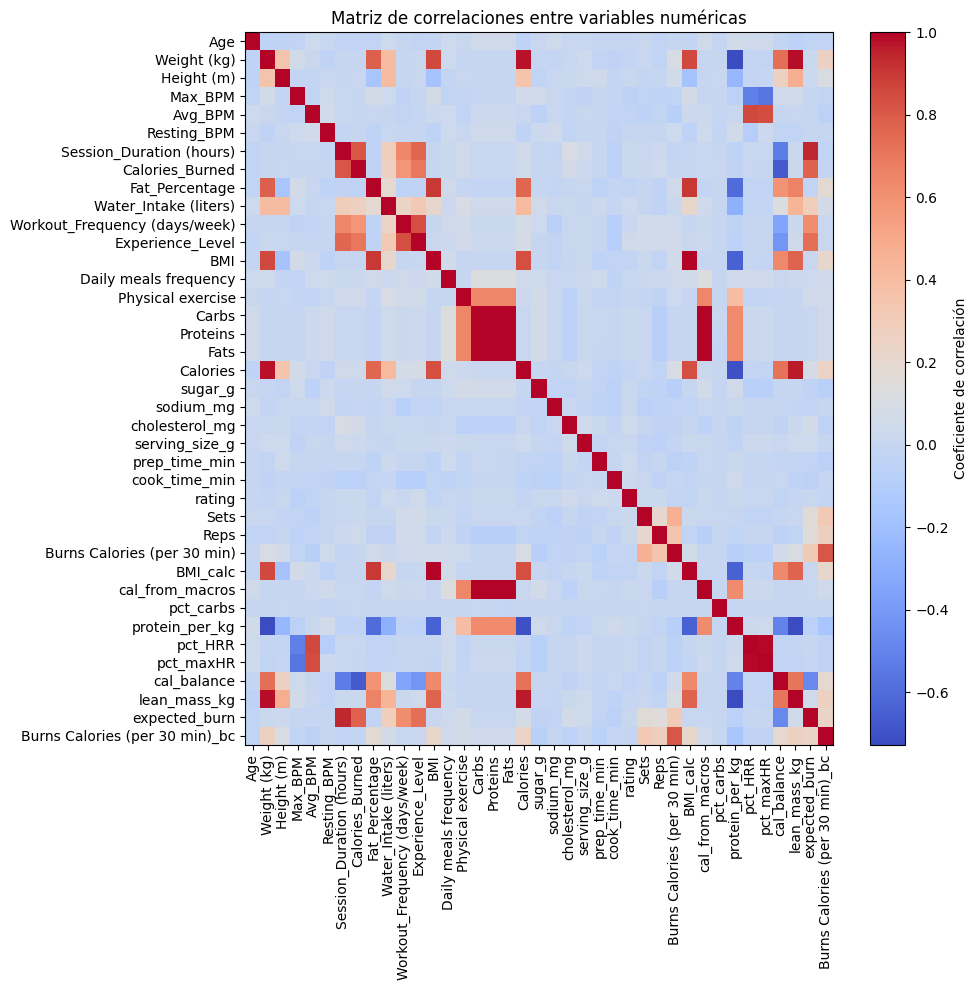

In [82]:
num_cols = lifeStyleData.select_dtypes(include=[np.number]).columns
corr = lifeStyleData[num_cols].corr(numeric_only=True)

# Plot de las correlación de las variables según un heatmap
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Matriz de correlaciones entre variables numéricas")
plt.colorbar(label="Coeficiente de correlación")
plt.tight_layout()
plt.show()

Según lo que se observa en el heatmap, las variables que tienen una correlación inesperada y más alta con BMI son:
- BMI_calc: tiene una alta correlación positiva con BMI
- protein_per_kg: tiene una alta correlación negativa con BMI

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [83]:
targetVar = "BMI"

# Variables seleccionadas
var_predict = [ "Workout_Frequency (days/week)", "Session_Duration (hours)", "Water_Intake (liters)"]
X_cols = [c for c in var_predict if c in lifeStyleData.columns]

  

X = lifeStyleData[X_cols].select_dtypes(include=[np.number]).copy() # Columnas X predictoras
y = lifeStyleData[targetVar].copy() # Columna y variable objetivo

# Limpiar NAs
clean_data = X.notna().all(axis=1) & y.notna()
X = X[clean_data]
y = y[clean_data]


b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [86]:
lm = LinearRegression()

lm = lm.fit(X_train, y_train)


print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))

Variance explanation R^2 = 0.05


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [87]:
rf = RandomForestRegressor().fit(X_train, y_train)

rf = RandomForestRegressor()

rf = rf.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(rf.score(X, y),2)))

Variance explanation R^2 = 0.86


Como se puede observar, tiene un mayor R^2 el RandomForestRegressor, por lo que es un mejor modelo.

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [88]:
lifeStyleData["bmiHealthy"] = ( (lifeStyleData["BMI"] >= 18.5) & (lifeStyleData["BMI"] <= 24.9)).astype(int)

display(lifeStyleData[["BMI", "bmiHealthy"]].head(10))

,BMI,bmiHealthy
0,24.87,1
1,23.48,1
2,21.15,1
3,32.45,0
4,14.83,0
5,31.03,0
6,18.44,0
7,31.64,0
8,27.65,0
9,19.66,1


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [89]:
X_rg = lifeStyleData[X_cols].select_dtypes(include=[np.number]).copy()
y_rg = lifeStyleData["bmiHealthy"].copy()

# Limpiar NAs
clean_data_rg = X_rg.notna().all(axis=1) & y_rg.notna()
X_rg = X_rg[clean_data_rg]
y_rg = y_rg[clean_data_rg]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_rg, y_rg, test_size=0.3, random_state=123, stratify=y_rg
)


# Modelo de regresión logística
regression = LogisticRegression(max_iter=1000)
regression.fit(Xc_train, yc_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [90]:

yc_pred = regression.predict(Xc_test)
acc = accuracy_score(yc_test, yc_pred)
cm = confusion_matrix(yc_test, yc_pred)

print("Accuracy:", round(acc, 4))
print("\nMatriz de confusión:\n", cm)
print("\nInforme de clasificación:\n", classification_report(yc_test, yc_pred))

Accuracy: 0.6213

Matriz de confusión:
 [[3602  116]
 [2156  126]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.63      0.97      0.76      3718
           1       0.52      0.06      0.10      2282

    accuracy                           0.62      6000
   macro avg       0.57      0.51      0.43      6000
weighted avg       0.59      0.62      0.51      6000



d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [92]:
# Coeficientes
coefs_cls = pd.Series(regression.coef_[0], index=X_cols).sort_values(ascending=False)
display(pd.DataFrame({
    "coef": coefs_cls,
    "impacto_abs": coefs_cls.abs()
}).sort_values("impacto_abs", ascending=False))

,coef,impacto_abs
Session_Duration (hours),0.561758,0.561758
Water_Intake (liters),-0.402203,0.402203
Workout_Frequency (days/week),0.154367,0.154367


La variable que influye más es Session_Duration(hours), ya que su coeficiente tiene mayor peso

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



- Los hábitos que parecen tener un mayor relación con BMI son: proteína y calcio (ya explicado previamente)
- Modelo más eficaz: Random Forest